In [1]:
import numpy as np
import tensorflow as tf

In [2]:
test1 = 'chandler_recent.jpg'
test2 = 'test_friends_childhood.jpg'
modelFullPath = 'model/output_graph_friends.pb'
labelsFullPath = 'model/output_labels_friends.txt'

In [3]:
def create_graph():
    with tf.gfile.FastGFile(modelFullPath, 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        _ = tf.import_graph_def(graph_def, name='')

In [4]:
def run_inference_on_image(imagePath):
    answer = None

    if not tf.gfile.Exists(imagePath):
        tf.logging.fatal('File does not exist %s', imagePath)
        return answer

    image_data = tf.gfile.FastGFile(imagePath, 'rb').read()

    create_graph()

    with tf.Session() as sess:

        softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
        predictions = sess.run(softmax_tensor,
                               {'DecodeJpeg/contents:0': image_data})
        predictions = np.squeeze(predictions)

        top_k = predictions.argsort()[-5:][::-1]
        f = open(labelsFullPath, 'rb')
        lines = f.readlines()
        labels = [str(w).replace("\n", "") for w in lines]
        for node_id in top_k:
            human_string = labels[node_id]
            score = predictions[node_id]
            print('%s (score = %.5f)' % (human_string, score))

        answer = labels[top_k[0]]
        return answer

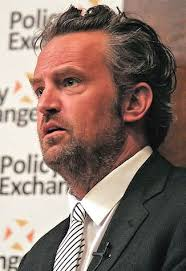

In [5]:
from IPython.display import Image
Image(test1)

In [6]:
run_inference_on_image(test1)

chandler (score = 0.51529)
ross (score = 0.42151)
joey (score = 0.06219)
phoebe (score = 0.00091)
monica (score = 0.00007)


'chandler'

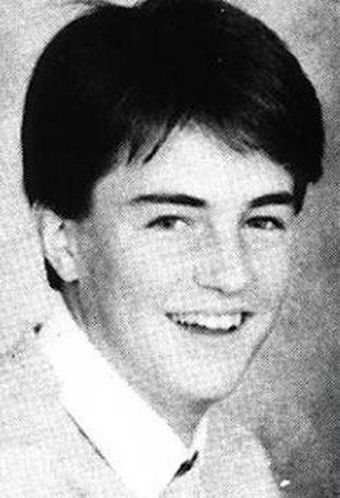

In [7]:
from IPython.display import Image
Image(test2)

In [8]:
run_inference_on_image(test2)

chandler (score = 0.44190)
joey (score = 0.39720)
ross (score = 0.15180)
monica (score = 0.00633)
phoebe (score = 0.00263)


'chandler'